In [3]:
import torchvision
import torch.nn as nn
import torch.nn.functional as nnf
import torch
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms.functional import to_tensor, normalize
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
from torchvision import transforms, models
from torchvision.datasets import Food101
from torchvision.models import ResNet50_Weights
import os
import shutil
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
print(torch.cuda.get_device_name(0))

def test_acc(net: nn.Module, test_loader: DataLoader):

	net.to(device)
	net.eval()
	
	total = 0
	correct = 0

	for images, labels in test_loader:
		images, labels = images.to(device), labels.to(device)
		total += labels.size(0)

		outputs = net(images)
		_, predicted = torch.max(outputs, 1)
		correct += (predicted == labels).sum().item()

	return correct / total * 100

def train_fn(epochs: int, train_loader: DataLoader, test_loader: DataLoader,
             net: nn.Module, loss_fn: nn.Module, optimizer: optim.Optimizer, train_dataset_length):

	losses = []
	accuracies = []

	net.to(device)

	for e in range(epochs):
		net.train()
		running_loss = 0.0

		for images, labels in train_loader:
			images, labels = images.to(device), labels.type(torch.LongTensor).to(device)

			optimizer.zero_grad()
			outputs = net(images)
			loss = loss_fn(outputs, labels)
			loss.backward()
			optimizer.step()

			running_loss += loss.item() * images.size(0)

		epoch_loss = running_loss / train_dataset_length

		print(f"Loss-ul la finalul epocii {e + 1}: {epoch_loss}")

		acc = test_acc(net, test_loader)
		print(f"Acuratetea la finalul epocii {e + 1} este {acc:.2f}%")

		losses.append(epoch_loss)
		accuracies.append(acc)

	loss_graph(losses)
	accuracy_graph(accuracies)

def loss_graph(losses):
    plt.plot(losses)

    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

def accuracy_graph(accuracies):
    plt.plot(accuracies)

    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.show()

cuda
NVIDIA GeForce RTX 4060 Laptop GPU


In [4]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dir = "data/train"
val_dir = "data/test"

train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(val_dir, transform=transform)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Training started
Loss-ul la finalul epocii 1: 2.9777855751703655
Acuratetea la finalul epocii 1 este 44.82%
Loss-ul la finalul epocii 2: 2.0756525834250072
Acuratetea la finalul epocii 2 este 50.44%
Loss-ul la finalul epocii 3: 1.8535385390690395
Acuratetea la finalul epocii 3 este 53.22%
Loss-ul la finalul epocii 4: 1.747472545775156
Acuratetea la finalul epocii 4 este 53.18%
Loss-ul la finalul epocii 5: 1.6643368094308035
Acuratetea la finalul epocii 5 este 54.50%
Loss-ul la finalul epocii 6: 1.6072212606157574
Acuratetea la finalul epocii 6 este 55.68%
Loss-ul la finalul epocii 7: 1.53882058024028
Acuratetea la finalul epocii 7 este 55.68%
Loss-ul la finalul epocii 8: 1.5043377685395498
Acuratetea la finalul epocii 8 este 55.90%
Loss-ul la finalul epocii 9: 1.4576017216727848
Acuratetea la finalul epocii 9 este 57.03%
Loss-ul la finalul epocii 10: 1.4303775325351291
Acuratetea la finalul epocii 10 este 57.56%


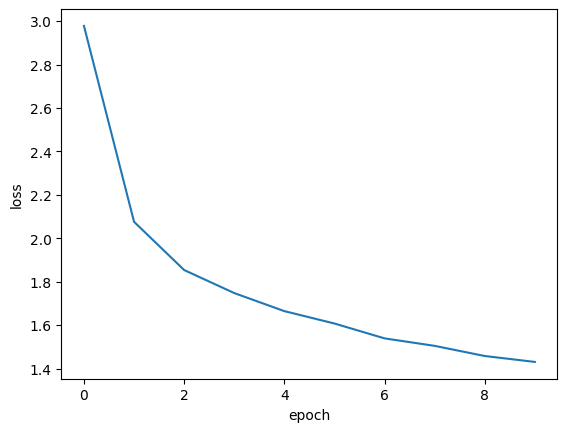

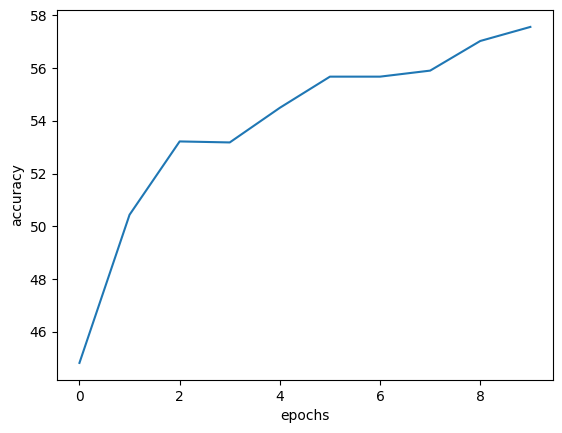

Duration of training: 48.77212826808294


In [3]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        resnet = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
        resnet = nn.Sequential(*list(resnet.children())[:-1])
        for param in resnet.parameters():
            param.requires_grad = False

        self.model = nn.Sequential(
            resnet,
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(2048, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.25),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),
            nn.Linear(128, 105)
        )

    def forward(self, x):
        return self.model(x)
    
model = Model()

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, betas=(0.95, 0.999), weight_decay=0.0001)
 
epochs = 10
start = time.time()
print('Training started')
train_fn(epochs, train_loader, test_loader, model, loss_fn, optimizer, len(train_dataset))
end = time.time()
print(f'Duration of training: {(end - start) / 60}')

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to C:\Users\Vlad Talpiga.VLR_PROJAMZ/.cache\torch\hub\checkpoints\resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:06<00:00, 15.7MB/s]


Training started
Loss-ul la finalul epocii 1: 3.0790179303789897
Acuratetea la finalul epocii 1 este 45.47%
Loss-ul la finalul epocii 2: 1.9883318470848932
Acuratetea la finalul epocii 2 este 51.87%
Loss-ul la finalul epocii 3: 1.667499144508725
Acuratetea la finalul epocii 3 este 53.16%
Loss-ul la finalul epocii 4: 1.4592423575946263
Acuratetea la finalul epocii 4 este 54.57%
Loss-ul la finalul epocii 5: 1.3230038067045666
Acuratetea la finalul epocii 5 este 55.07%
Loss-ul la finalul epocii 6: 1.2215055542294941
Acuratetea la finalul epocii 6 este 55.37%
Loss-ul la finalul epocii 7: 1.146550725815788
Acuratetea la finalul epocii 7 este 54.95%
Loss-ul la finalul epocii 8: 1.0517357232532805
Acuratetea la finalul epocii 8 este 55.60%
Loss-ul la finalul epocii 9: 1.0046220415660314
Acuratetea la finalul epocii 9 este 56.06%
Loss-ul la finalul epocii 10: 0.9359212683420333
Acuratetea la finalul epocii 10 este 56.11%


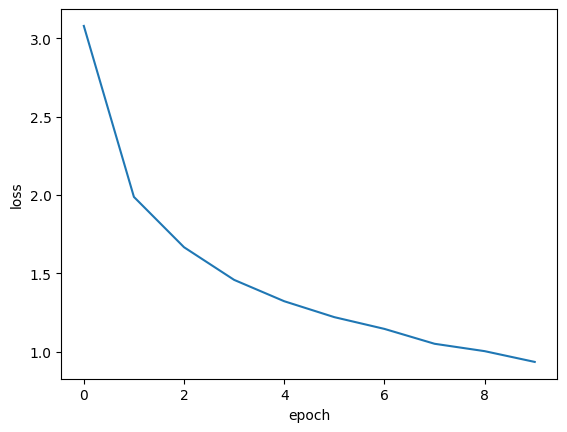

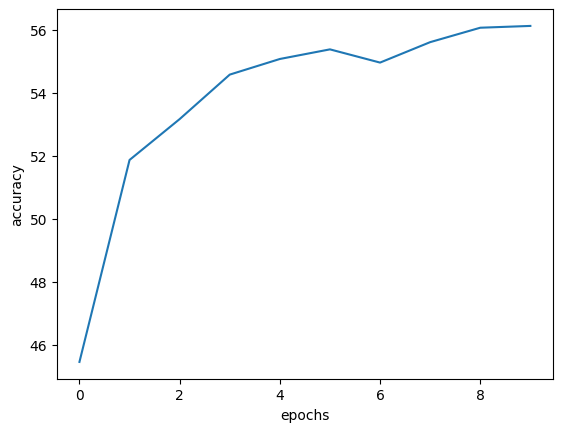

Duration of training: 50.81618138154348


In [6]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        resnet = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
        resnet = nn.Sequential(*list(resnet.children())[:-1])
        for param in resnet.parameters():
            param.requires_grad = False

        self.model = nn.Sequential(
            resnet,
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(2048, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.25),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),
            nn.Linear(128, 105)
        )

    def forward(self, x):
        return self.model(x)
    
model = Model()

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, betas=(0.95, 0.999), weight_decay=0.0001)
 
epochs = 10
start = time.time()
print('Training started')
train_fn(epochs, train_loader, test_loader, model, loss_fn, optimizer, len(train_dataset))
end = time.time()
print(f'Duration of training: {(end - start) / 60}')

Training started
Loss-ul la finalul epocii 1: 3.0851291845412483
Acuratetea la finalul epocii 1 este 45.28%
Loss-ul la finalul epocii 2: 1.9880988246978275
Acuratetea la finalul epocii 2 este 51.07%
Loss-ul la finalul epocii 3: 1.6425858983085269
Acuratetea la finalul epocii 3 este 54.04%
Loss-ul la finalul epocii 4: 1.429711736103845
Acuratetea la finalul epocii 4 este 54.11%
Loss-ul la finalul epocii 5: 1.2784262146117196
Acuratetea la finalul epocii 5 este 55.20%
Loss-ul la finalul epocii 6: 1.1705412016369048
Acuratetea la finalul epocii 6 este 54.67%
Loss-ul la finalul epocii 7: 1.062952533570547
Acuratetea la finalul epocii 7 este 54.95%
Loss-ul la finalul epocii 8: 0.9901689840649801
Acuratetea la finalul epocii 8 este 55.28%
Loss-ul la finalul epocii 9: 0.9083139801933652
Acuratetea la finalul epocii 9 este 54.99%
Loss-ul la finalul epocii 10: 0.8521506477840363
Acuratetea la finalul epocii 10 este 54.74%


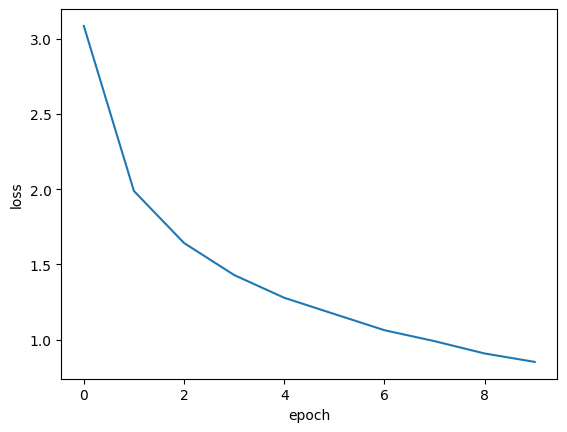

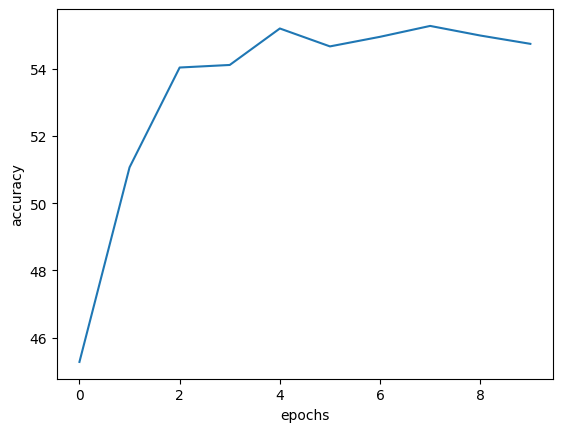

Duration of training: 47.58018479347229


In [7]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        resnet = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
        resnet = nn.Sequential(*list(resnet.children())[:-1])
        for param in resnet.parameters():
            param.requires_grad = False

        self.model = nn.Sequential(
            resnet,
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(2048, 512),
            nn.LeakyReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.25),
            nn.Linear(512, 128),
            nn.LeakyReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),
            nn.Linear(128, 105)
        )

    def forward(self, x):
        return self.model(x)
    
model = Model()

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, betas=(0.95, 0.999), weight_decay=0.0001)
 
epochs = 10
start = time.time()
print('Training started')
train_fn(epochs, train_loader, test_loader, model, loss_fn, optimizer, len(train_dataset))
end = time.time()
print(f'Duration of training: {(end - start) / 60}')

Training started
Loss-ul la finalul epocii 1: 2.8075283213721383
Acuratetea la finalul epocii 1 este 48.36%
Loss-ul la finalul epocii 2: 1.8047600528474839
Acuratetea la finalul epocii 2 este 52.95%
Loss-ul la finalul epocii 3: 1.4743885727231465
Acuratetea la finalul epocii 3 este 53.24%
Loss-ul la finalul epocii 4: 1.2856813351767404
Acuratetea la finalul epocii 4 este 55.07%
Loss-ul la finalul epocii 5: 1.1359181332058377
Acuratetea la finalul epocii 5 este 54.23%
Loss-ul la finalul epocii 6: 1.0224031976139734
Acuratetea la finalul epocii 6 este 55.35%
Loss-ul la finalul epocii 7: 0.9248087705203465
Acuratetea la finalul epocii 7 este 54.46%
Loss-ul la finalul epocii 8: 0.8571700249002093
Acuratetea la finalul epocii 8 este 55.37%
Loss-ul la finalul epocii 9: 0.7921182613032205
Acuratetea la finalul epocii 9 este 54.38%
Loss-ul la finalul epocii 10: 0.724328982080732
Acuratetea la finalul epocii 10 este 54.93%


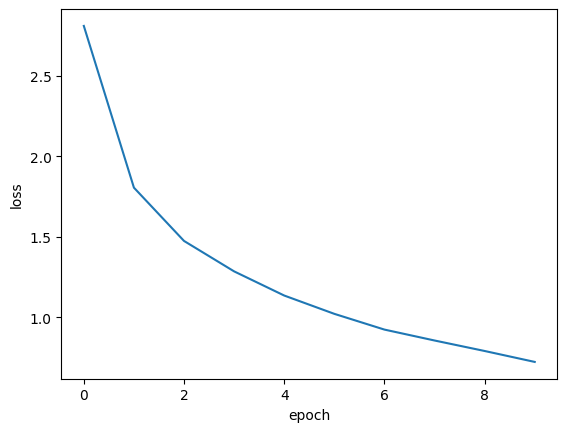

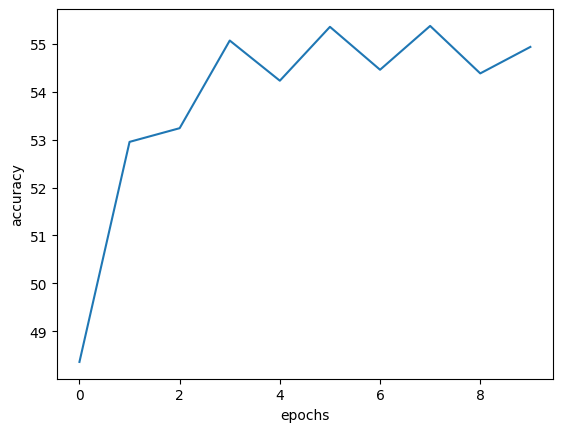

Duration of training: 47.51734322706859


In [8]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        resnet = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
        resnet = nn.Sequential(*list(resnet.children())[:-1])
        for param in resnet.parameters():
            param.requires_grad = False

        self.model = nn.Sequential(
            resnet,
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(2048, 512),
            nn.Sigmoid(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.25),
            nn.Linear(512, 128),
            nn.Sigmoid(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),
            nn.Linear(128, 105)
        )

    def forward(self, x):
        return self.model(x)
    
model = Model()

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, betas=(0.95, 0.999), weight_decay=0.0001)
 
epochs = 10
start = time.time()
print('Training started')
train_fn(epochs, train_loader, test_loader, model, loss_fn, optimizer, len(train_dataset))
end = time.time()
print(f'Duration of training: {(end - start) / 60}')

Training started
Loss-ul la finalul epocii 1: 2.8859129718598866
Acuratetea la finalul epocii 1 este 47.58%
Loss-ul la finalul epocii 2: 1.8867273602258592
Acuratetea la finalul epocii 2 este 52.38%
Loss-ul la finalul epocii 3: 1.5664583915831551
Acuratetea la finalul epocii 3 este 53.30%
Loss-ul la finalul epocii 4: 1.367028371856326
Acuratetea la finalul epocii 4 este 54.59%
Loss-ul la finalul epocii 5: 1.2229634403652616
Acuratetea la finalul epocii 5 este 53.90%
Loss-ul la finalul epocii 6: 1.0932686881867666
Acuratetea la finalul epocii 6 este 54.30%
Loss-ul la finalul epocii 7: 1.01198183926325
Acuratetea la finalul epocii 7 este 55.45%
Loss-ul la finalul epocii 8: 0.9202786622350178
Acuratetea la finalul epocii 8 este 54.29%
Loss-ul la finalul epocii 9: 0.8267147208925277
Acuratetea la finalul epocii 9 este 55.71%
Loss-ul la finalul epocii 10: 0.80272187600817
Acuratetea la finalul epocii 10 este 56.29%


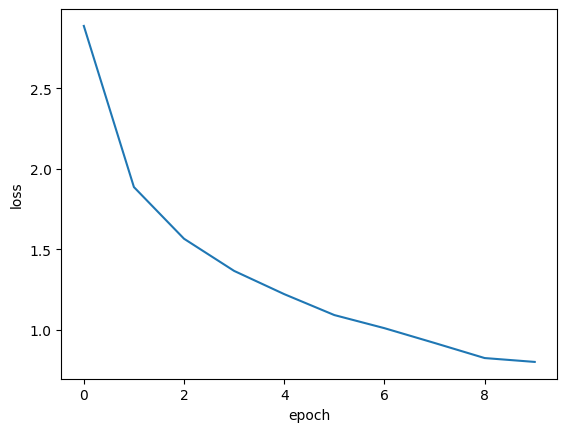

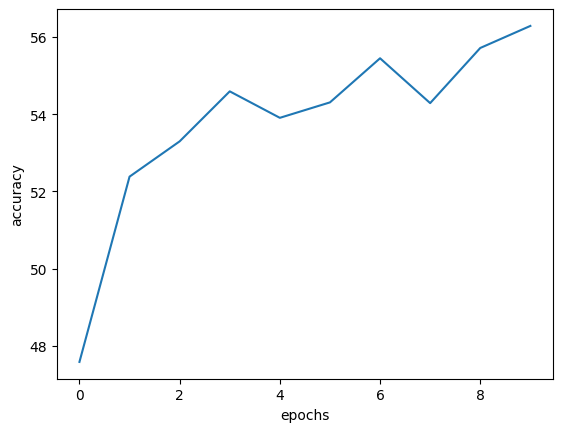

Duration of training: 47.580902437369026


In [9]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        resnet = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
        resnet = nn.Sequential(*list(resnet.children())[:-1])
        for param in resnet.parameters():
            param.requires_grad = False

        self.model = nn.Sequential(
            resnet,
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(2048, 512),
            nn.Tanh(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.25),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),
            nn.Linear(128, 105)
        )

    def forward(self, x):
        return self.model(x)
    
model = Model()

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, betas=(0.95, 0.999), weight_decay=0.0001)
 
epochs = 10
start = time.time()
print('Training started')
train_fn(epochs, train_loader, test_loader, model, loss_fn, optimizer, len(train_dataset))
end = time.time()
print(f'Duration of training: {(end - start) / 60}')

Training started
Loss-ul la finalul epocii 1: 2.9725785585130966
Acuratetea la finalul epocii 1 este 48.76%
Loss-ul la finalul epocii 2: 1.8980309135194808
Acuratetea la finalul epocii 2 este 53.22%
Loss-ul la finalul epocii 3: 1.5620666010266258
Acuratetea la finalul epocii 3 este 53.62%
Loss-ul la finalul epocii 4: 1.3466826719253782
Acuratetea la finalul epocii 4 este 54.08%
Loss-ul la finalul epocii 5: 1.1651623730432419
Acuratetea la finalul epocii 5 este 56.65%
Loss-ul la finalul epocii 6: 1.0392105035479107
Acuratetea la finalul epocii 6 este 55.39%
Loss-ul la finalul epocii 7: 0.9403801024149334
Acuratetea la finalul epocii 7 este 55.45%
Loss-ul la finalul epocii 8: 0.8434699664456504
Acuratetea la finalul epocii 8 este 54.90%
Loss-ul la finalul epocii 9: 0.763055702436538
Acuratetea la finalul epocii 9 este 54.65%
Loss-ul la finalul epocii 10: 0.699336470740182
Acuratetea la finalul epocii 10 este 55.10%


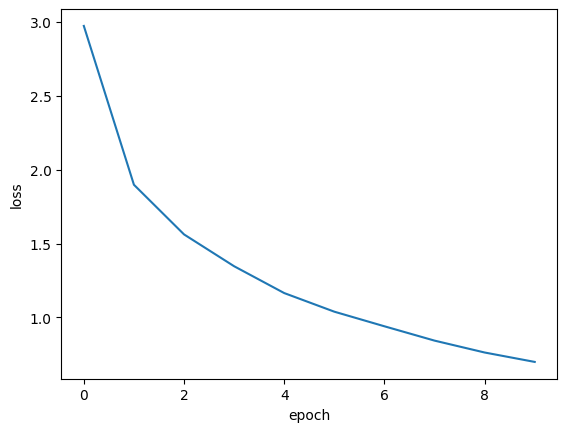

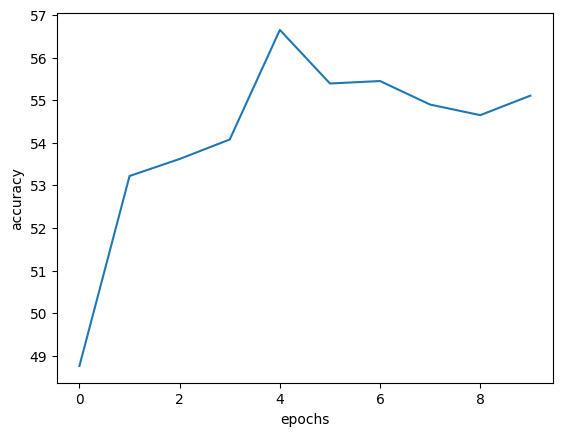

Duration of training: 47.693557647864026


In [10]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        resnet = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
        resnet = nn.Sequential(*list(resnet.children())[:-1])
        for param in resnet.parameters():
            param.requires_grad = False

        self.model = nn.Sequential(
            resnet,
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(2048, 512),
            nn.GELU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.25),
            nn.Linear(512, 128),
            nn.GELU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),
            nn.Linear(128, 105)
        )

    def forward(self, x):
        return self.model(x)
    
model = Model()

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, betas=(0.95, 0.999), weight_decay=0.0001)
 
epochs = 10
start = time.time()
print('Training started')
train_fn(epochs, train_loader, test_loader, model, loss_fn, optimizer, len(train_dataset))
end = time.time()
print(f'Duration of training: {(end - start) / 60}')

Training started
Loss-ul la finalul epocii 1: 2.8436043811071485
Acuratetea la finalul epocii 1 este 49.18%
Loss-ul la finalul epocii 2: 1.824317991831946
Acuratetea la finalul epocii 2 este 53.66%
Loss-ul la finalul epocii 3: 1.4871748538547092
Acuratetea la finalul epocii 3 este 54.32%
Loss-ul la finalul epocii 4: 1.2791176099020338
Acuratetea la finalul epocii 4 este 56.08%
Loss-ul la finalul epocii 5: 1.120897819034637
Acuratetea la finalul epocii 5 este 56.29%
Loss-ul la finalul epocii 6: 0.9887073822324238
Acuratetea la finalul epocii 6 este 54.42%
Loss-ul la finalul epocii 7: 0.8864083963273064
Acuratetea la finalul epocii 7 este 55.14%
Loss-ul la finalul epocii 8: 0.7973256895239391
Acuratetea la finalul epocii 8 este 55.07%
Loss-ul la finalul epocii 9: 0.7298569574658833
Acuratetea la finalul epocii 9 este 56.15%
Loss-ul la finalul epocii 10: 0.6540067387838212
Acuratetea la finalul epocii 10 este 56.06%


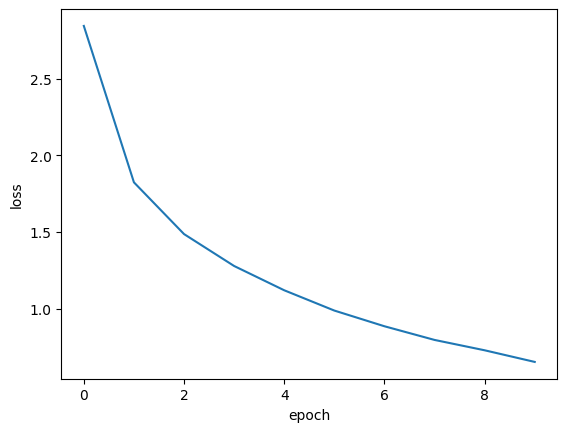

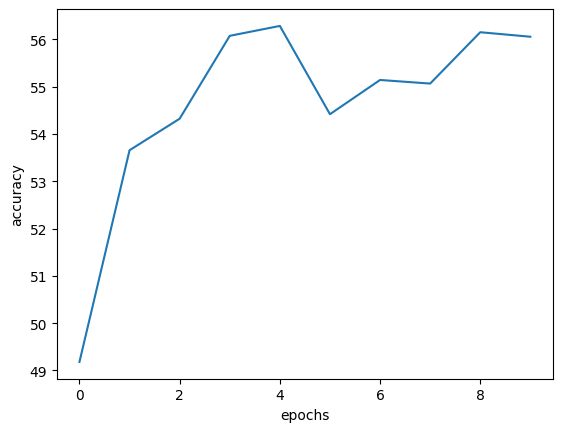

Duration of training: 47.76113159656525


In [11]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        resnet = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
        resnet = nn.Sequential(*list(resnet.children())[:-1])
        for param in resnet.parameters():
            param.requires_grad = False

        self.model = nn.Sequential(
            resnet,
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(2048, 512),
            nn.ELU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.25),
            nn.Linear(512, 128),
            nn.ELU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),
            nn.Linear(128, 105)
        )

    def forward(self, x):
        return self.model(x)
    
model = Model()

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, betas=(0.95, 0.999), weight_decay=0.0001)
 
epochs = 10
start = time.time()
print('Training started')
train_fn(epochs, train_loader, test_loader, model, loss_fn, optimizer, len(train_dataset))
end = time.time()
print(f'Duration of training: {(end - start) / 60}')

Training started
Loss-ul la finalul epocii 1: 2.8296436430915954
Acuratetea la finalul epocii 1 este 48.84%
Loss-ul la finalul epocii 2: 1.8094539273882668
Acuratetea la finalul epocii 2 este 53.35%
Loss-ul la finalul epocii 3: 1.4935331805092948
Acuratetea la finalul epocii 3 este 54.23%
Loss-ul la finalul epocii 4: 1.278945430422586
Acuratetea la finalul epocii 4 este 54.78%
Loss-ul la finalul epocii 5: 1.1225874818771604
Acuratetea la finalul epocii 5 este 55.47%
Loss-ul la finalul epocii 6: 1.0001590475960382
Acuratetea la finalul epocii 6 este 55.37%
Loss-ul la finalul epocii 7: 0.9127019553865705
Acuratetea la finalul epocii 7 este 56.13%
Loss-ul la finalul epocii 8: 0.8223030252153911
Acuratetea la finalul epocii 8 este 55.35%
Loss-ul la finalul epocii 9: 0.7470156244701809
Acuratetea la finalul epocii 9 este 55.62%
Loss-ul la finalul epocii 10: 0.7138128778972322
Acuratetea la finalul epocii 10 este 55.96%


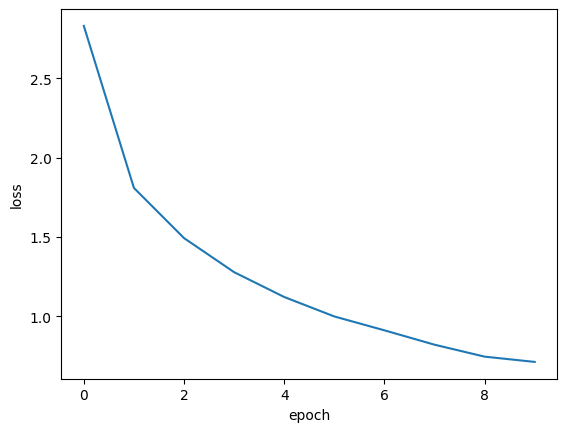

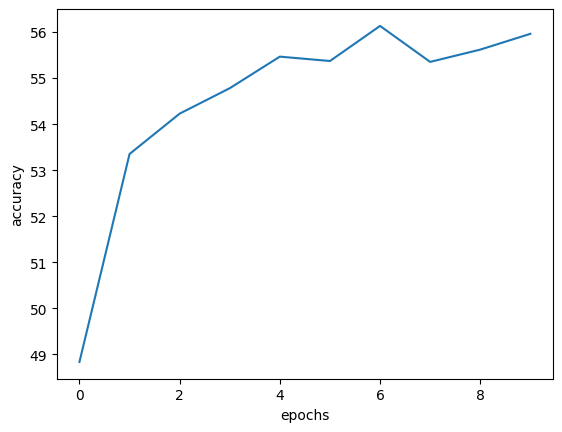

Duration of training: 47.655400915940604


In [12]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        resnet = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
        resnet = nn.Sequential(*list(resnet.children())[:-1])
        for param in resnet.parameters():
            param.requires_grad = False

        self.model = nn.Sequential(
            resnet,
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(2048, 512),
            nn.SELU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.25),
            nn.Linear(512, 128),
            nn.SELU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),
            nn.Linear(128, 105)
        )

    def forward(self, x):
        return self.model(x)
    
model = Model()

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, betas=(0.95, 0.999), weight_decay=0.0001)
 
epochs = 10
start = time.time()
print('Training started')
train_fn(epochs, train_loader, test_loader, model, loss_fn, optimizer, len(train_dataset))
end = time.time()
print(f'Duration of training: {(end - start) / 60}')